In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = 0.0;
L = 100;
dt = 0.01;
dx = 0.1;
dv = 0.1;
gamma = 2;
sigma = 0.8;
c = 0
K = 1
tmax = dt*100;


In [3]:
f = np.zeros((L, L, 2))
f[int(L/2)][int(L/2)][0] = 1
res = [[],[],[],[]]

In [4]:
n = 0
while time <= tmax:
  for i in range(L-1):
    for j in range(L-1):
      f[i][j][c-1] = f[i][j][c] + dt*(-j*dv*(f[i+1][j][c]-f[i-1][j][c])/(2*dx)+gamma*f[i][j][c]+(gamma*j*dv + K * i*dx)*(f[i][j+1][c]-f[i][j-1][c])/(2*dv)+sigma*(f[i][j+1][c]-2*f[i][j][c]+f[i][j-1][c])/(4*dv*dv))
      if (time > tmax-dt):
        res[0].append(i*dx)
        res[1].append(j*dv)
        res[2].append(f[i][j][c-1])
        res[3].append(time)
  c = 1-c
  time += dt
  n += 1

In [5]:
def update(t):
  graph = [[],[],[]]
  for i in range(len(res[0])):
    if res[3][i] == t:
      graph[0].append(res[0][i])
      graph[1].append(res[1][i])
      graph[2].append(res[2][i])
  return graph

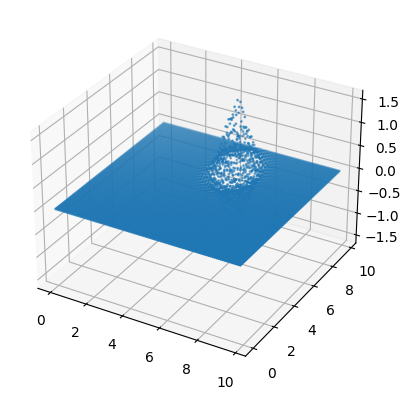

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

graph = ax.scatter(res[0],res[1],res[2], s=1)


